In [26]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchbnn 
from torchbnn.modules import linear

In [28]:
iris = load_iris()
X = iris.data  # Input features (4-dimensional)
y = iris.target  # Class labels (3 classes)
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [29]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
pca = PCA(n_components=2)
X = pca.fit_transform(X)

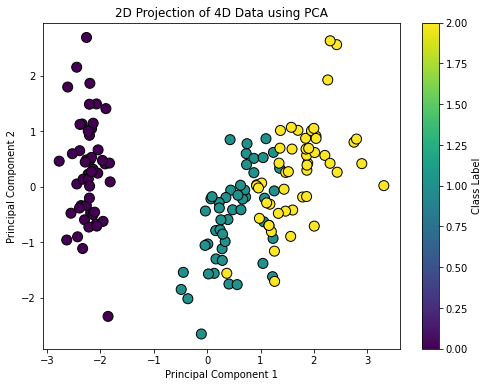

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.colorbar(label='Class Label')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Projection of 4D Data using PCA')
plt.show()

In [31]:
X = torch.FloatTensor(X)
y = torch.LongTensor(y)



In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train)


tensor([[-2.3346, -1.1153],
        [ 0.3670, -1.5615],
        [ 1.2565, -0.0773],
        [-2.1843, -0.4690],
        [ 0.2835, -1.3293],
        [ 1.5646, -0.8967],
        [ 0.2886, -0.8557],
        [ 1.1141, -0.2929],
        [ 2.7988,  0.8568],
        [ 2.4263,  2.5567],
        [ 2.7519,  0.8004],
        [ 0.6648, -0.2259],
        [-0.1102, -2.6541],
        [ 0.1588, -0.7921],
        [ 0.3365, -0.9884],
        [-2.2653, -0.3377],
        [-2.3434,  1.1278],
        [ 2.0067, -0.7114],
        [ 1.3463,  0.4224],
        [-1.8316,  0.4237],
        [ 1.2342, -0.9333],
        [-2.3847,  1.1204],
        [ 2.3049,  2.6263],
        [-1.9518, -0.6256],
        [ 0.0235, -1.5725],
        [ 1.4402, -0.0470],
        [ 1.6027, -0.4217],
        [-2.0512,  0.2422],
        [ 0.9780, -0.5718],
        [-2.2865,  0.4417],
        [-2.2070,  0.9241],
        [ 0.4763, -0.4173],
        [ 0.6246,  0.0249],
        [-2.2622,  2.6863],
        [ 1.8520,  0.6761],
        [ 1.3728,  1

In [33]:
n_neurons = 40
class bnn(nn.Module):
    def __init__(self):
        super(bnn, self).__init__()
        
        self.fc1 = linear.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=2, out_features=n_neurons)
        self.fc2 = linear.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=n_neurons, out_features=n_neurons)
        self.fc3 = linear.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=n_neurons, out_features=3)
            
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [34]:
model = bnn()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [35]:
losses=[]
epochs = 3500
for epoch in range(epochs):
    y_pred = model.forward(X_train)
    loss = criterion(y_pred,y_train)
    losses.append(loss.detach().numpy())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}')

Epoch [0/3500], Loss: 1.1140
Epoch [100/3500], Loss: 0.1637
Epoch [200/3500], Loss: 0.1373
Epoch [300/3500], Loss: 0.1354
Epoch [400/3500], Loss: 0.1274
Epoch [500/3500], Loss: 0.1193
Epoch [600/3500], Loss: 0.1104
Epoch [700/3500], Loss: 0.1233
Epoch [800/3500], Loss: 0.1005
Epoch [900/3500], Loss: 0.0983
Epoch [1000/3500], Loss: 0.0956
Epoch [1100/3500], Loss: 0.0944
Epoch [1200/3500], Loss: 0.0898
Epoch [1300/3500], Loss: 0.0787
Epoch [1400/3500], Loss: 0.0730
Epoch [1500/3500], Loss: 0.0693
Epoch [1600/3500], Loss: 0.0639
Epoch [1700/3500], Loss: 0.0580
Epoch [1800/3500], Loss: 0.0412
Epoch [1900/3500], Loss: 0.0486
Epoch [2000/3500], Loss: 0.0290
Epoch [2100/3500], Loss: 0.0229
Epoch [2200/3500], Loss: 0.0222
Epoch [2300/3500], Loss: 0.0160
Epoch [2400/3500], Loss: 0.0174
Epoch [2500/3500], Loss: 0.0180
Epoch [2600/3500], Loss: 0.0112
Epoch [2700/3500], Loss: 0.0179
Epoch [2800/3500], Loss: 0.0168
Epoch [2900/3500], Loss: 0.0148
Epoch [3000/3500], Loss: 0.0072
Epoch [3100/3500], L

Text(0.5, 0, 'Epochs')

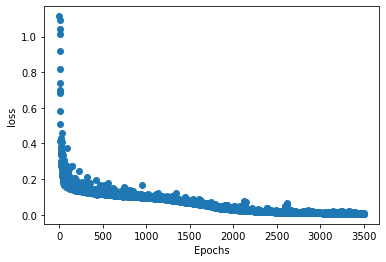

In [36]:
plt.scatter(range(epochs),np.asarray(losses))
plt.ylabel('loss')
plt.xlabel('Epochs')

In [37]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
print(grid)

tensor([[-3.2743, -3.1541],
        [-3.2643, -3.1541],
        [-3.2543, -3.1541],
        ...,
        [ 3.7856,  3.1859],
        [ 3.7956,  3.1859],
        [ 3.8056,  3.1859]])


In [38]:
n_passes = 100
predictions = []

In [39]:
model.eval()
with torch.no_grad():
    for _ in range(n_passes):
        pred = model(torch.FloatTensor(grid))
        predictions.append(torch.softmax(pred, dim=1).numpy())
        


In [40]:
predictions = np.asarray(predictions)
mean_preds = predictions.mean(axis=0)
mean_preds[0]

array([1.000000e+00, 6.114169e-35, 4.344025e-44], dtype=float32)

In [41]:
mean_preds = mean_preds.argmax(axis=1).reshape(xx.shape)
uncertainty = predictions.std(axis=0).sum(axis=1).reshape(xx.shape)

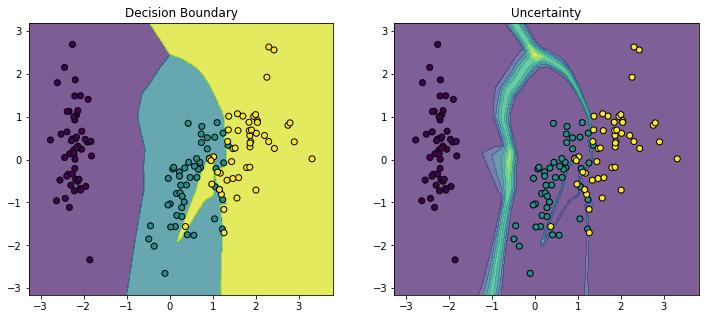

In [42]:
plt.figure(figsize=(12, 5))
    
# Plot decision boundary
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, mean_preds, cmap='viridis', alpha=0.7)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='viridis')
plt.title('Decision Boundary')

plt.subplot(1, 2, 2)
plt.contourf(xx, yy, uncertainty, cmap='viridis', alpha=0.7)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='viridis')
plt.title('Uncertainty')
    
plt.show()

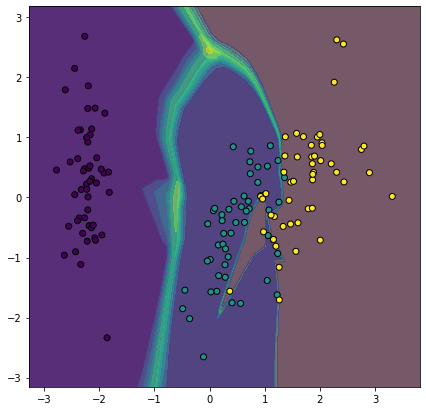

In [43]:
plt.figure(figsize=(7, 7))
plt.contourf(xx, yy, mean_preds, cmap='viridis', alpha=0.7)
plt.contourf(xx, yy, uncertainty, cmap='viridis', alpha=0.7)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='viridis')

In [44]:
def calculate_accuracy_with_uncertainty(model, X, y, threshold=0.5, n_samples=300):
    model.eval()
    accuracies = []
    
    with torch.no_grad():
        for _ in range(n_samples):
            outputs = model(X)
            _, predicted = torch.max(outputs, 1)  # Get the class with the highest probability
            correct = (predicted == y).float().sum()
            accuracy = correct / y.shape[0]
            accuracies.append(accuracy.item())
    
    accuracies = np.array(accuracies)
    mean_accuracy = accuracies.mean()
    accuracy_uncertainty = accuracies.std()
    
    return mean_accuracy, accuracy_uncertainty

In [45]:
mean_accuracy, accuracy_uncertainty = calculate_accuracy_with_uncertainty(model, X_test, y_test)
print(f'Accuracy on test set: {mean_accuracy * 100:.2f}% ± {accuracy_uncertainty * 100:.2f}%')

Accuracy on test set: 92.73% ± 2.67%
